# Vectorization for Speed

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [2]:
n = 1000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
class Timer: #@save
    """Record multiple running times."""
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        """Start the timer."""
        self.tik = time.time()
    
    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        """Return the sum of time."""
        return sum(self.times)
    
    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()
    

In [4]:
# Method 1.
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.00709 sec'

In [5]:
# Method 2.
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00018 sec'

# The Normal Distribution and Squared Loss

In [6]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

In [7]:
x = np.arange(-7, 7, 0.07)

# Mean and standard deviation pairs
params = [(0,1), (0,2), (3,1)]


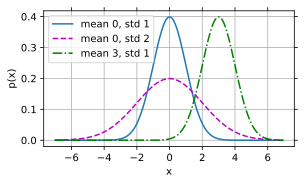

In [8]:
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])